In [32]:
import pandas as pd
import os
from scipy.cluster.hierarchy import dendrogram, fcluster
import matplotlib.pyplot as plt
import pickle

project_dir = os.path.abspath(os.path.join( '__file__' , '..', '..'))
model_dir = os.path.join(project_dir, 'models')
data = os.path.join(project_dir, 'data', 'processed', 'patent_table_clean_new.pickle')
model = os.path.join(model_dir, 'tf_idf_vectorizers.pickle')

df = pd.read_pickle(data)
kml = pd.read_pickle(os.path.join(model_dir, 'kmeans_labels639.pickle'))
with open(os.path.join(model_dir, 'z_matrix639.pickle'), 'rb') as f:
    z = pickle.load(f)
with open(model, 'rb') as f:
    mdl = pickle.load(f)['abstract']    

# tfidf_dict = os.path.join(model_dir, 'tf_idf_features_dict.pickle')
# with open(tfidf_dict, 'rb') as f:
#     tfidf_mat = pickle.load(f)['abstract']

In [33]:
kml.head()

,kmeans_labels
3935991,514
3944004,248
3945191,210
3947279,545
3948497,324


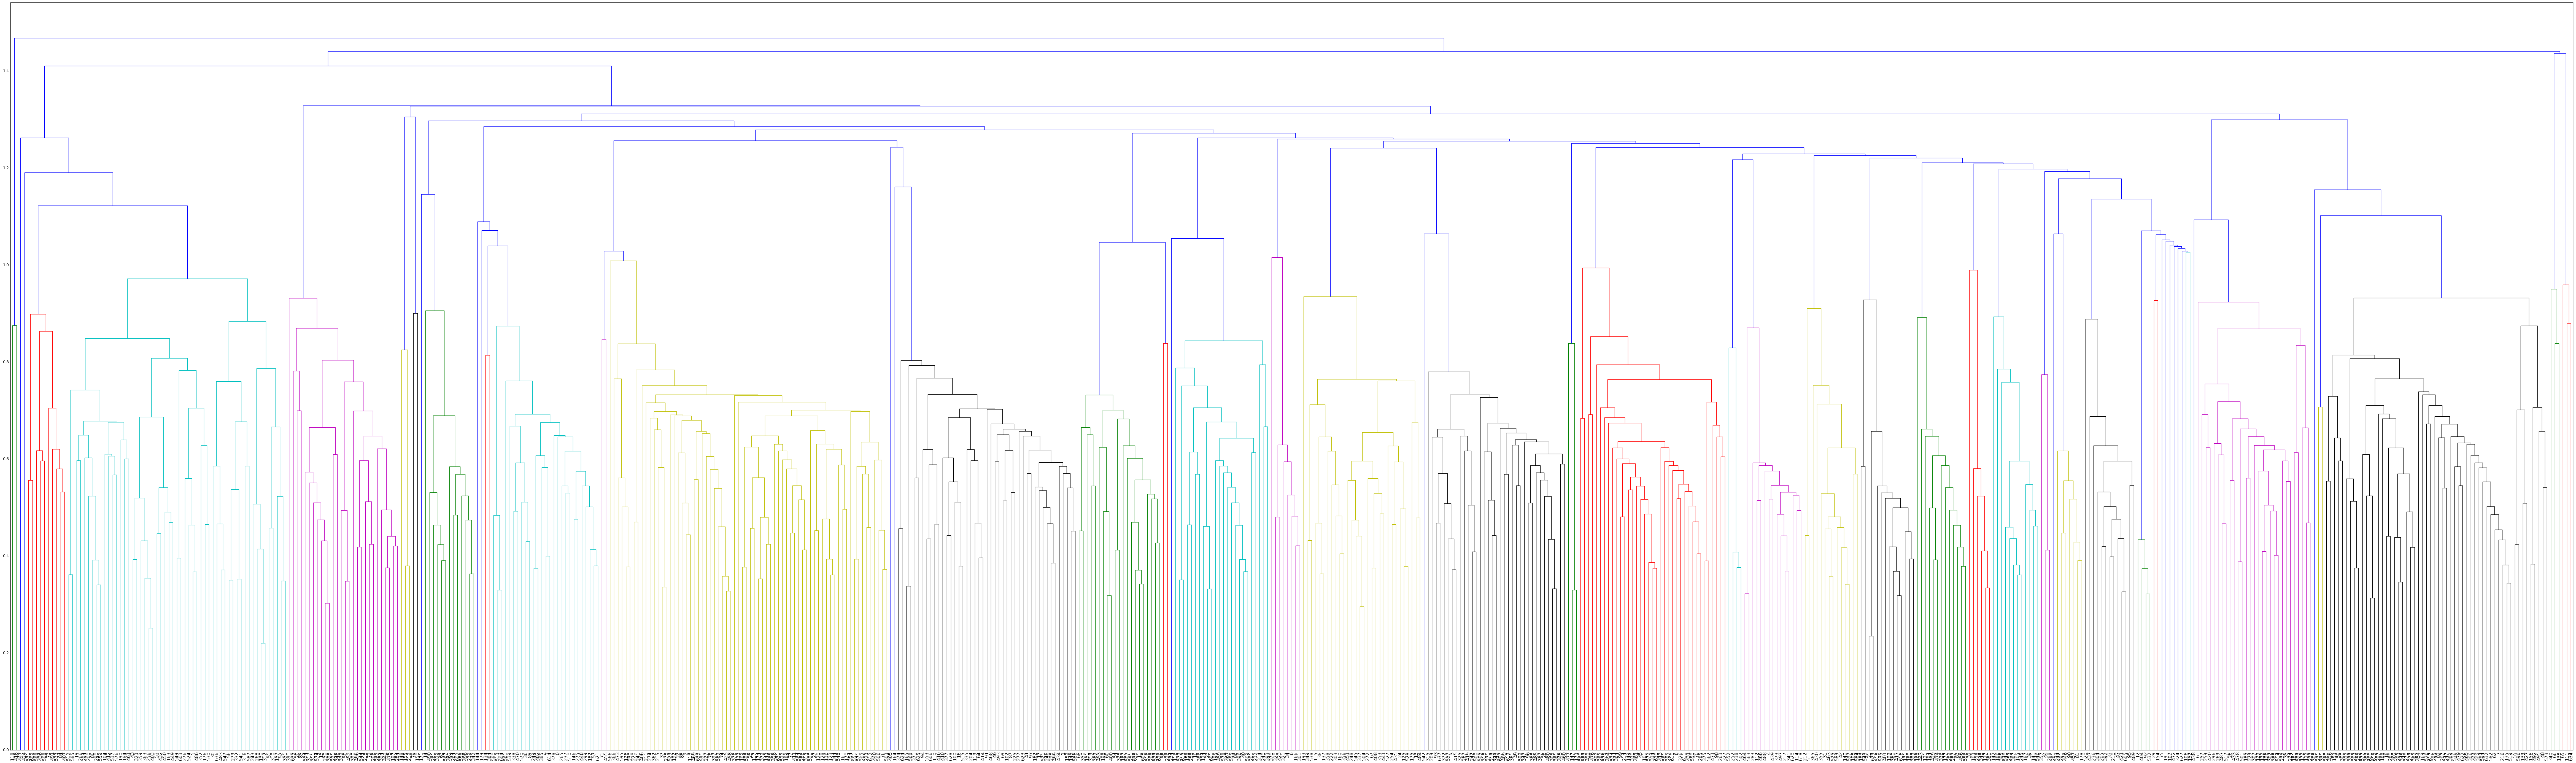

In [83]:
plt.figure(figsize=(120, 35))
r = dendrogram(z, leaf_rotation=90., leaf_font_size=12.)
plt.show()
plt.savefig('dendrogram.png')

In [167]:
from collections import Counter
import nltk
stops = nltk.corpus.stopwords.words('english') + \
['method','methods','apparatus','invention','system','device', 'thereof', 'one', 'present', 'least', 'also', 'may', 'wherein',
'use','used', 'useful', 'first', 'second', 'two', 'using', 'end']

In [178]:
dict_of_commons = {}
bounds = [(118,418),(531,407),(148,219),(79,150),(134,384),(71,455),(58,226),(370,301),(477,173),(552,502),(32,380),\
          (357,288),(29,154),(106,152),(231,331),(340,138),(65,634)]
for bnd in bounds:
    print('\ncalculatin pair', bnd)
    cl = r['leaves'][r['leaves'].index(bnd[0]):r['leaves'].index(bnd[1])+1]
    ind = []
    for lcs in cl:
        ind += list(kml[kml['kmeans_labels']==lcs].index)
    txt = df.loc[ind]['abstract'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(txt)
    words_dist = nltk.FreqDist(w for w in words if w not in stops and w.isalnum())
    dict_of_commons[bnd] = words_dist.most_common(100)
    print(list(zip(*words_dist.most_common(100)))[0])


calculatin pair (118, 418)
('soybean', 'plant', 'plants', 'variety', 'cultivar', 'methods', 'relates', 'parts', 'produced', 'producing', 'seeds', 'crossing', 'another', 'provided', 'derived', 'designated', 'hybrid', 'cultivars', 'inbred', 'line', 'maize', 'lines', 'disclosed', 'varieties', 'transgenic', 'breeding', 'novel', 'cotton', 'material', 'corn', 'genetic', 'containing', 'transgenes', 'seed', 'tissue', 'cells', 'cultures', 'therefrom', 'derivatives', 'trait', 'according', 'regenerated', 'still', 'thus', 'either', 'includes', 'acid', 'surface', 'parent', 'male', 'new', 'key', 'female', 'portion', 'bean', 'include', 'habit', 'instrument', 'comprising', 'formed', 'mutant', 'end', 'string', 'body', 'musical', 'provides', 'position', 'drum', 'introgressing', 'member', 'oil', 'high', 'including', 'progeny', 'germplasm', 'signal', 'native', 'variants', 'dp', 'sunflower', 'flowers', 'lettuce', 'gene', 'distinct', 'characterized', 'color', 'garden', 'weight', 'particularly', 'element', 

In [179]:
pickle.dump(dict_of_commons, open(os.path.join(model_dir, 'dict_of_commons.pickle'), 'wb'))